Unsupervised Analysis

In [1]:
import os

positive = 'train/pos'
negative = 'train/neg'

X_train = []
y_train = []

#Positive Reviews
for filename in os.listdir(positive):
    with open(os.path.join(positive, filename), encoding = 'utf-8') as file:
        X_train.append(file.read())
        y_train.append(1)

#Negative Reviews
for filename in os.listdir(negative):
    with open(os.path.join(negative, filename), encoding='utf-8') as file:
        X_train.append(file.read())
        y_train.append(0)

# Check if data loaded correctly
print(f"Total reviews loaded: {len(X_train)}")
print(f"First review snippet:\n{X_train[0][:500]}...")  # print first 500 characters
print(f"First review label: {y_train[0]}")

Total reviews loaded: 25000
First review snippet:
Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a s...
First review label: 1


In [2]:
#vectorize the reviews
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000) #this picks the top 5000 words
X_vec = vectorizer.fit_transform(X_train)

print(f"TF-IDF feature matrix shape: {X_vec.shape}")

TF-IDF feature matrix shape: (25000, 5000)


Apply PCA to reduce dimensions

In [3]:
from sklearn.decomposition import PCA

#reduce the TF-IDF feature matrix to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vec.toarray())

#check PCA result shape
print(f"PCA reduced shape: {X_pca.shape}")
print(f"First 5 PCA points:\n{X_pca[:5]}")

PCA reduced shape: (25000, 2)
First 5 PCA points:
[[-0.07300405 -0.06978911]
 [ 0.08977048 -0.01287584]
 [-0.03280067 -0.12208024]
 [-0.11356862 -0.04722323]
 [-0.07053045 -0.05678319]]


Plot PCA scatterplot

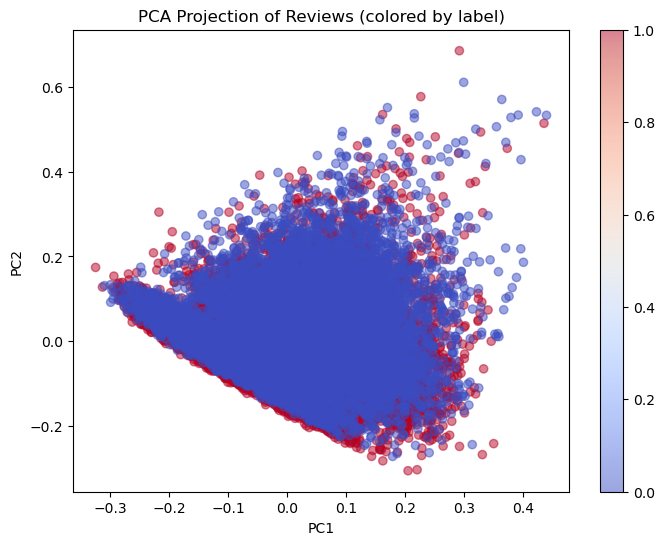

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
plt.title('PCA Projection of Reviews (colored by label)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
plt.show()

Apply K-means Clustering

In [5]:
from sklearn.cluster import KMeans

#cluster into 2 groups
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels=kmeans.fit_predict(X_vec)

#print first few cluster labels
print(f"First 20 cluster labels:\n{cluster_labels[:20]}")

First 20 cluster labels:
[1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0]


Plot K-Means Clustering Result

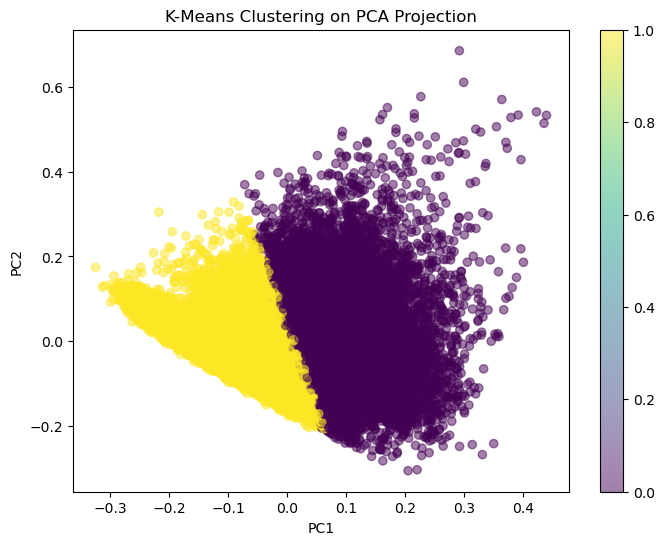

In [6]:
#plot using the 2D PCA coordinates
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering on PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
plt.show()

Plot Feature Histograms

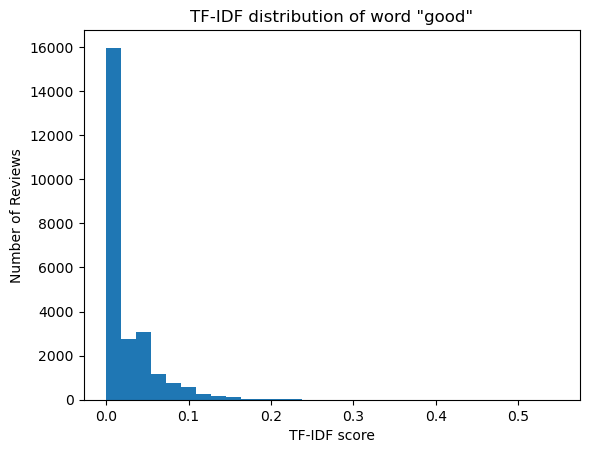

In [7]:
import numpy as np

#Get feature names
feature_names = vectorizer.get_feature_names_out()

#Example with the word 'good'
word_idx = np.where(feature_names == 'good')[0][0]

#Plot the histogram
plt.hist(X_vec[:, word_idx].toarray(), bins=30)
plt.title ('TF-IDF distribution of word "good"')
plt.xlabel('TF-IDF score')
plt.ylabel('Number of Reviews')
plt.show()

Correlation Matrix of some Random Words

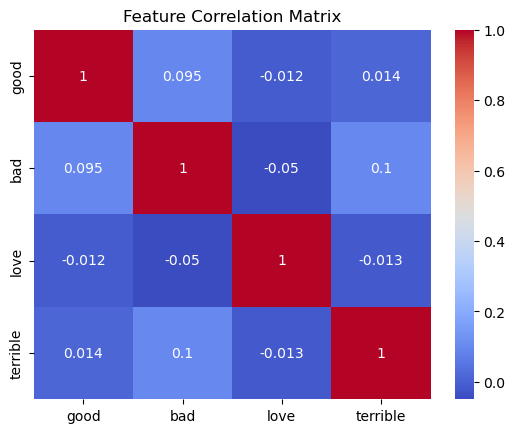

In [ ]:
import seaborn as sns
import pandas as pd

# Pick interesting and random words
words = ['good', 'bad', 'love', 'terrible']
indices = [np.where(feature_names == word)[0][0] for word in words]

small_matrix = X_vec[:, indices].toarray()

# Make a dataframe
df_small = pd.DataFrame(small_matrix, columns=words)

# Plot correlation matrix
corr = df_small.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
